<a href="https://colab.research.google.com/github/Lamz16/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install keras_tuner

Trial 30 Complete [00h 00m 48s]
val_accuracy: 0.6966000199317932

Best val_accuracy So Far: 0.7038999795913696
Total elapsed time: 01h 03m 26s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3222 - loss: 1.8133 - val_accuracy: 0.5367 - val_loss: 1.3195
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5492 - loss: 1.2654 - val_accuracy: 0.6033 - val_loss: 1.1121
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6200 - loss: 1.0658 - val_accuracy: 0.6600 - val_loss: 0.9606
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6659 - loss: 0.9446 - val_accuracy: 0.6752 - val_loss: 0.9282
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7003 - loss: 0.8536 - val_accuracy: 0.6819 - val_loss: 0.9227
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7255 - loss: 0.7879 - val_accuracy: 0.6900 - val_loss: 0.8928
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7450 -

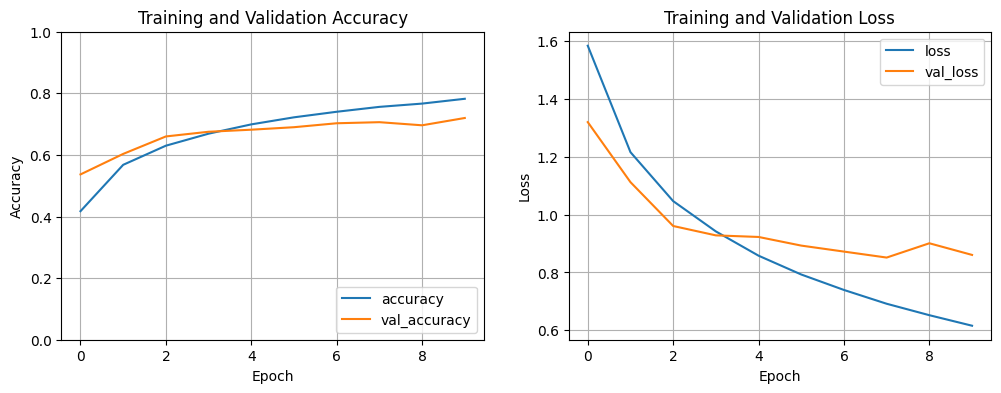

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse','ship', 'truck']

def build_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3,3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
  model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(layers.Dense(10))

  optimizer = tf.keras.optimizers.Adam(learning_rate= hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  return model


tuner = RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials=30,
    executions_per_trial=1,
    directory ='my_dir',
    project_name ='cifar10_tunning'
  )

tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediksi: dog


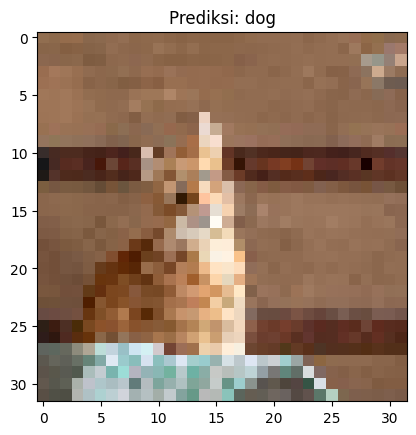

In [45]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    print(f"Prediksi: {class_names[predicted_class]}")
    plt.imshow(img)
    plt.title(f"Prediksi: {class_names[predicted_class]}")
    plt.show()


image_path = 'my_dir/contoh3.jpg'
predict_image(image_path)